# Image classification

https://huggingface.co/docs/datasets/image_classification

In [ ]:
from datasets import load_dataset

dataset = load_dataset("AI-Lab-Makerere/beans")
dataset

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [ ]:
dataset["train"][0]

{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 0}

In [ ]:
import albumentations

transform = albumentations.Compose([
    albumentations.RandomCrop(width=256, height=256),
    albumentations.HorizontalFlip(p=0.5),
    albumentations.RandomBrightnessContrast(p=0.2),
])

In [ ]:
import numpy as np

def transforms(examples):
    examples["pixel_values"] = [
        transform(image=np.array(image))["image"] for image in examples["image"]
    ]

    return examples

In [ ]:
dataset.set_transform(transforms)

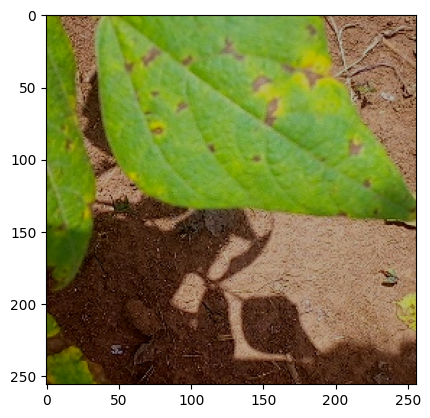

In [ ]:
import matplotlib.pyplot as plt

img = dataset["train"][0]["pixel_values"]
plt.imshow(img);